<a href="https://colab.research.google.com/github/JayeshSuryavanshi/CSE-587-DIC/blob/main/587_DIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#all the libraries that will be used
import folium
import pandas as pd
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/DIC DATA/GlobalLandTemperaturesByCity.csv")
dataframe.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [ ]:
dataframe.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [ ]:
dataframe.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [ ]:
dataframe.shape

(8599212, 7)

In [ ]:
dataframe.isnull().sum()


dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [ ]:
dataframe.nunique()

dt                                 3239
AverageTemperature               103481
AverageTemperatureUncertainty     10902
City                               3448
Country                             159
Latitude                             73
Longitude                          1227
dtype: int64

In [ ]:
df1 = dataframe['AverageTemperature'].interpolate(method="linear")
df1

0           6.068
1           6.012
2           5.956
3           5.900
4           5.844
            ...  
8599207    11.464
8599208    15.043
8599209    18.775
8599210    18.025
8599211    18.025
Name: AverageTemperature, Length: 8599212, dtype: float64

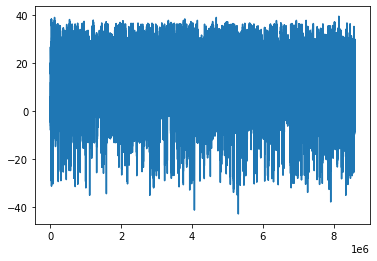

In [ ]:
df1.plot()